# Math

In this chapter we will talk about some math background knowledge which will be useful later on.
 1. Quadratic form and positive definite matrix.
  * We will give the definitions of these two and some visualization to give a intuition, and we will implement a function to tell if a matrix is positive definite matrix.
 2. Directional derivative, gradient and hessian matrix.
  * Give definitions, visualization and functions to calculate these three.
 3. Convex function 
  * Give def, vis of convex function and some ways to implement these tests.
 4. Optimality condition of unconstrained optimization.
  * Give def, vis and funcs to check if a point X in function f(X) satisfy the condition (or if it's a local minimum point).
 5. Optimality condition of constrained optimization.
  * K-T test.

## 1 Quadratic form and positive definite matrix

In [1]:
import sympy as sp

# define a positive definite symmetric matrix
A = sp.Matrix([
    [1, 0.5],
    [0.5, 2]
])
# define a negative definte symmetric matrix
B = sp.Matrix([
    [1, 0.5],
    [0.5, 0]
])
# define a 3x3 matrix to expand all funcs to atribute dimention
C = sp.Matrix([
    [5, 2, -4],
    [2, 1, -2],
    [-4, -2, 5]
])

print(f"A is {'positive definite matrix' if A.is_positive_definite else 'negative definite matrix'}")
print(f"B is {'positive definite matrix' if B.is_positive_definite else 'negative definite matrix'}")

A is positive definite matrix
B is negative definite matrix


In [2]:
# define variables
X_list_2d = [sp.Symbol(f"x{i}", real=True) for i in range(2)]
X_list_3d = [sp.Symbol(f"{i}", real=True) for i in ['a', 'b', 'c']]

# a func to generate X vector
def vec_X(X_list):
    return sp.Matrix([X_list]).reshape(len(X_list), 1)

X_2d = vec_X(X_list_2d)
X_2d

Matrix([
[x0],
[x1]])

In [3]:
X_3d = vec_X(X_list_3d)
X_3d

Matrix([
[a],
[b],
[c]])

In [4]:
# define functions attached to each matrix
funcA = sp.expand(sp.MatMul(X_2d.T, A, X_2d))[0]
funcA

x0**2 + 1.0*x0*x1 + 2*x1**2

In [5]:
funcB = sp.expand(sp.MatMul(X_2d.T, B, X_2d))[0]
funcB

x0**2 + 1.0*x0*x1

In [6]:
funcC = sp.expand(sp.MatMul(X_3d.T, C, X_3d))[0]
funcC

5*a**2 + 4*a*b - 8*a*c + b**2 - 4*b*c + 5*c**2

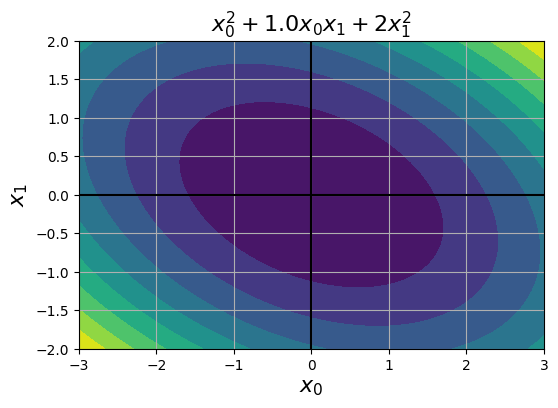

Matrix([
[  1, 0.5],
[0.5,   2]])

In [7]:
# visualize these two func (only for 2D)
import numpy as np
import matplotlib.pyplot as plt


# implement a function to do the vis
def vis_func(func, X_list_2d, x0a=-3, x0b=3, x1a=-2, x1b=2, points=500, levels=10):
    func_cal = sp.lambdify(X_list_2d, func)
    
    x0s = np.linspace(x0a, x0b, points)
    x1s = np.linspace(x1a, x1b, points)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xs = np.c_[x0.ravel(), x1.ravel()]
    Ys = np.array([func_cal(Xi[0], Xi[1]) for Xi in Xs], dtype=float).reshape(x1.shape)

    levelsY = np.linspace(np.min(Ys), np.max(Ys), levels)

    plt.figure(figsize=(6, 4))
    plt.title(f"${sp.latex(func)}$", fontsize=16)
    plt.xlabel("$x_0$", fontsize=16)
    plt.ylabel("$x_1$", fontsize=16)

    plt.axis([x0a, x0b, x1a, x1b])
    plt.grid(True)
    plt.axhline(y=0, color="k")
    plt.axvline(x=0, color="k")
    plt.contourf(x0, x1, Ys, levels=levelsY)

    # plt.show() does not put here for plot expanding the code if you need 


vis_func(funcA, X_list_2d)
plt.show()
A

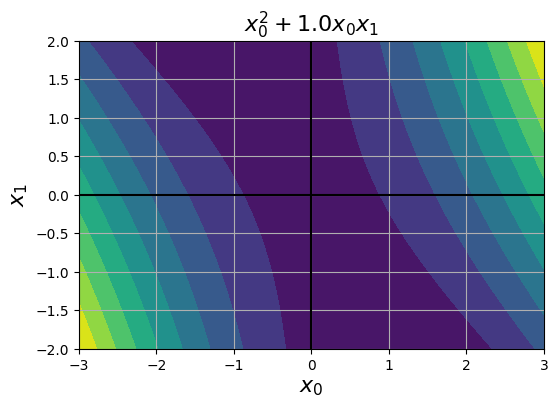

Matrix([
[  1, 0.5],
[0.5,   0]])

In [8]:
vis_func(funcB, X_list_2d)
plt.show()
B

In [9]:
# a function which can tell if a matrix is positive definite
def is_pdm(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return "This matrix is not a quare matrix"
    
    for i in range(1, matrix.shape[0]+1):
        # principal subdeterminant
        psd = matrix[:i, :i].det()
        if psd <= 0:
            return False
    return True



print(f"A: {A.is_positive_definite}, {is_pdm(A)}")
print(f"B: {B.is_positive_definite}, {is_pdm(B)}")
print(f"C: {C.is_positive_definite}, {is_pdm(C)}")

A: True, True
B: False, False
C: True, True


## 2 Directional derivative, gradient and hessian matrix

In [10]:
# calculate a func's all first-order partial derivatives
def partials(X_list, func):
    pars = []
    for x in X_list:
        pars.append(sp.diff(func, x))

    return pars


pars = partials(X_list_2d, funcA)
print(pars)
sp.Matrix([pars])

[2*x0 + 1.0*x1, 1.0*x0 + 4*x1]


Matrix([[2*x0 + 1.0*x1, 1.0*x0 + 4*x1]])

In [11]:
pars = partials(X_list_3d, funcC)
print(pars)
sp.Matrix([pars])

[10*a + 4*b - 8*c, 4*a + 2*b - 4*c, -8*a - 4*b + 10*c]


Matrix([[10*a + 4*b - 8*c, 4*a + 2*b - 4*c, -8*a - 4*b + 10*c]])

In [12]:
# calculate directional deribative
def dirc_derv(func, X_list, start, end, points):
    d = len(X_list)
    delta_p = (end - start) / 10**5
    delta_p_norm = np.linalg.norm(delta_p)

    pars = partials(X_list, func)
    par_cals = [sp.lambdify(X_list, par) for par in pars]
    
    xis = [np.linspace(start[i], end[i], points) for i in range(d)]
    Xs = np.array(list(zip(*xis)))

    Ys = []
    for Xi in Xs: 
        Y = sum([par(*Xi) * (delta_p[i] / delta_p_norm) for par, i in zip(par_cals, range(d))])
        Ys.append(Y)
    Ys = np.array(Ys, dtype=float)

    return Xs, Ys

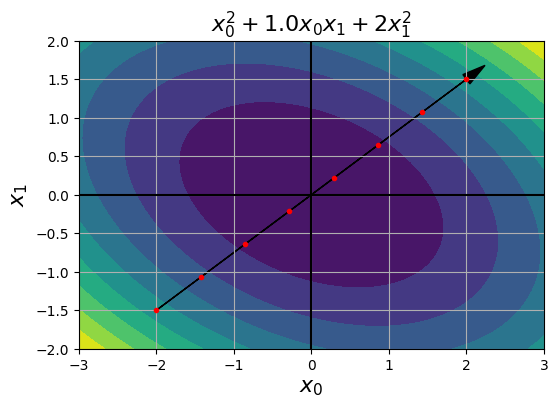

[-9.2, -6.57, -3.94, -1.31, 1.31, 3.94, 6.57, 9.2]

In [13]:
start = np.array([-2, -1.5])
end = np.array([2, 1.5])
Xs, Ys = dirc_derv(funcA, X_list_2d, start, end, points=8)

vis_func(funcA, X_list_2d)
plt.plot(Xs[:, 0], Xs[:, 1], "r.")
plt.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1],
        head_width=0.15, head_length=0.3, fc="black", ec="black")
plt.show()

[round(Y, 2) for Y in Ys]

In [14]:
start = np.array([-1, -1, -1])
end = np.array([1, 1, 1])
Xs, Ys = dirc_derv(funcC, X_list_3d, start, end, points=8)
[round(Y, 2) for Y in Ys]

[-3.46, -2.47, -1.48, -0.49, 0.49, 1.48, 2.47, 3.46]

In [15]:
# calculate gradient
def gdt(func, X_list, X_value=None):
    d = len(X_list)

    gdt_exp = partials(X_list, func)
    
    if X_value:
        gdt_val = []
        for gdt_e in gdt_exp:
            gdt_v = sp.lambdify(X_list, gdt_e)(*X_value)
            gdt_val.append(gdt_v)
        return sp.Matrix(gdt_val).reshape(d, 1)
    
    return sp.Matrix([gdt_exp]).reshape(d, 1)

In [16]:
gdt(funcA, X_list_2d)

Matrix([
[2*x0 + 1.0*x1],
[1.0*x0 + 4*x1]])

In [17]:
gdt(funcA, X_list_2d, X_value=[1, 2])

Matrix([
[4.0],
[9.0]])

In [18]:
gdt(funcC, X_list_3d)

Matrix([
[ 10*a + 4*b - 8*c],
[  4*a + 2*b - 4*c],
[-8*a - 4*b + 10*c]])

In [19]:
gdt(funcC, X_list_3d, X_value=[1, 1, 1])

Matrix([
[ 6],
[ 2],
[-2]])

In [20]:
# calculate heesian matrix
def hess(func, X_list, X_value=None):
    d = len(X_list)

    # first-order derivative --- gradient vector
    gdt_exp = partials(X_list, func)
    # second-order derivative --- hessian matrix
    hess_exp = []
    for gdt_e in gdt_exp:
        hess_exp.append(partials(X_list, gdt_e))

    if X_value:
        hess_val = []
        for hess_e in hess_exp:
            hess_v = [sp.lambdify(X_list, hess_)(*X_value) for hess_ in hess_e]            
            hess_val.append(hess_v)
        return sp.Matrix(hess_val).reshape(d, d)
    
    return sp.Matrix(hess_exp).reshape(d, d)

In [21]:
hess(funcA, X_list_2d)

Matrix([
[  2, 1.0],
[1.0,   4]])

In [22]:
sp.hessian(funcA, varlist=X_list_2d)

Matrix([
[  2, 1.0],
[1.0,   4]])

In [23]:
hess(funcC, X_list_3d)

Matrix([
[10,  4, -8],
[ 4,  2, -4],
[-8, -4, 10]])

In [24]:
sp.hessian(funcC, varlist=X_list_3d)

Matrix([
[10,  4, -8],
[ 4,  2, -4],
[-8, -4, 10]])

## 3 Convex function

In [25]:
# a test to tell if a func is convex, only for quadratic form
def is_cvx(func, X_list):
    """ONLY for quadratic form"""
    d = len(X_list)
    
    hess_exp = hess(func, X_list)
    hess_val = hess(func, X_list, [0]*d)

    if hess_exp != hess_val:
        return "This func is not quadratic form!"
    
    return is_pdm(hess_exp)
    

In [26]:
is_cvx(funcA, X_list_2d), is_cvx(funcB, X_list_2d), is_cvx(funcC, X_list_3d)

(True, False, True)

## 4 Optimality condition of unconstrained optimization

In [27]:
# optimal condition check for unconstrained problems
def is_opt_unc(func, X_list, X_value, tol=10e-5):
    """check if X-value is a local minimum point
    for convex functions, local minimum point is their globle minmum point
    tol is the tolerance of this problem"""
    gdt_v = np.array(gdt(func, X_list, X_value), dtype=float)
    hess_v = hess(func, X_list, X_value)
    if np.linalg.norm(gdt_v) < tol and is_pdm(hess_v):
        return True
    return False


is_opt_unc(funcA, X_list_2d, [0, 0]), is_opt_unc(funcB, X_list_2d, [0, 0]), is_opt_unc(funcC, X_list_3d, [0, 0, 1])

(True, False, False)

## 5 Optimality condition of constrained optimization

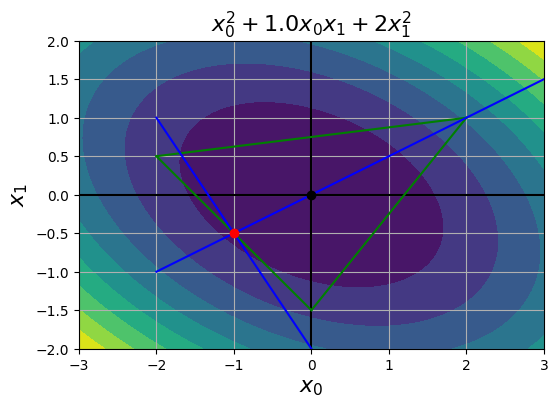

In [28]:
# make constrains
# inequal constrains (points)
vis_func(funcA, X_list_2d)
G1_p = np.array([[0, -1.5], [2, 1]])
G2_p = np.array([[-2, 0.5], [2, 1]])
G3_p = np.array([[0, -1.5], [-2, 0.5]])
for Gi_p in [G1_p, G2_p, G3_p]:
    plt.plot(Gi_p[:, 0], Gi_p[:, 1], "g")

# equal constrains
H1_p = np.array([[-2, -1], [3, 1.5]])
H2_p = np.array([[-2, 1], [0, -2]])
for Hi_p in [H1_p, H2_p]:
    plt.plot(Hi_p[:, 0], Hi_p[:, 1], "b")

# point we need to check if it's optimal
x_val_1 = [-1, -0.5]
x_val_2 = [0, 0]
plt.plot(x_val_1[0], x_val_1[1], "ro")
plt.plot(x_val_2[0], x_val_2[1], "ko")

plt.show()

In [29]:
# trans points to hyper plane, hyper plane: b^T \times X, only conosider 2D
def ps2hp(X_list, X_points):
    d = 2

    A = np.array(X_points)
    if A.shape[0] < d and A.shape[1] < d: 
        return "Lack of points"
    A = A[:d,:d]
    
    # check if this hyper plane contrains 0 point, We don't consider this equaltion has no solution 
    if np.linalg.det(A) == 0:
        return sp.nsimplify(X_points[0, 1]/X_points[0, 0])*X_list[0] - X_list[1]
    
    b = np.array([[1], [1]])
    X_theta = np.matmul(np.linalg.inv(A), b)
    X_theta = sp.Matrix([[sp.nsimplify(theta, tolerance=0.001)] for theta in X_theta[:, 0]])
    
    return sp.expand(sp.MatMul(X_theta.T, vec_X(X_list)))[0] -1

In [30]:
# inequal constrains (>=0)
G1_c = - ps2hp(X_list_2d, G1_p)*6
G1_c

-5*x0 + 4*x1 + 6

In [31]:
G2_c = - ps2hp(X_list_2d, G2_p)*6
G2_c

x0 - 8*x1 + 6

In [32]:
G3_c = - ps2hp(X_list_2d, G3_p)*3
G3_c

2*x0 + 2*x1 + 3

In [33]:
G_cs = [G1_c, G2_c, G3_c]

In [34]:
H1_c = ps2hp(X_list_2d, H1_p)*2
H1_c

x0 - 2*x1

In [35]:
H2_c = - ps2hp(X_list_2d, H2_p)
H2_c

3*x0/4 + x1/2 + 1

In [36]:
H_cs = [H1_c, H2_c]

In [61]:
# K-T condition check
def is_opt_c(func, X_list, X_value, Gs=None, Hs=None, tol=10e-5, check_in=True):
    """check if X_value satisfies minimum condition,
    Gs are all inequal constrains (>=0), Hs are all equal constrains
    when check_in is True, is_opt_c will check if X_value is in feasible domain
    when Gs=Hs=None, it becomes the necessary condition check of local minimum for unconstrain problems"""
    d = len(X_list)
    n_l = len(Gs) if Gs else 0
    n_u = len(Hs) if Hs else 0

    Gs_cal = [sp.lambdify(X_list, G) for G in Gs] if Gs else None
    Hs_cal = [sp.lambdify(X_list, H) for H in Hs] if Hs else None

    # feasible check
    if check_in:
        Gs_fea = [not(Gs_c(*X_value)>=0) for Gs_c in Gs_cal] if Gs else [False]
        Hs_fea = [not(Hs_c(*X_value)==0) for Hs_c in Hs_cal] if Hs else [False]

        if sum(Gs_fea) or sum(Hs_fea):
            return "X_value is not in feasible domain!"
        
    # get ls and us
    # l*g(X) has to be 0
    ls = [sp.Symbol(f"l{i}") if Gs_cal[i](*X_value) == 0 else 0 for i in range(n_l)] if Gs else None
    us = [sp.Symbol(f"u{i}") for i in range(n_u)] if Hs else None

    # calculate all gradients
    func_gdt_v = gdt(func, X_list, X_value)
    Gs_gdt_v = [gdt(G, X_list, X_value) for G in Gs] if Gs else None
    Hs_gdt_v = [gdt(H, X_list, X_value) for H in Hs] if Hs else None

    # turn them into matrix
    func_gdt_m = func_gdt_v
    Gs_gdt_m = c_(Gs_gdt_v) if Gs else None
    ls_m = vec_X(ls) if Gs else None
    Hs_gdt_m = c_(Hs_gdt_v) if Hs else None
    us_m = vec_X(us) if Hs else None
    
    # calculate each K-T part
    l_times_gdtG = sp.MatMul(Gs_gdt_m, ls_m) if Gs else sp.Matrix([[0] for i in range(d)])
    u_times_gdtH = sp.MatMul(Hs_gdt_m, us_m) if Hs else sp.Matrix([[0] for i in range(d)])

    return func_gdt_m - l_times_gdtG - u_times_gdtH


def c_(Vec_list):
    Mtr = Vec_list[0]
    for vec in Vec_list[1:]:
        Mtr = Mtr.row_join(vec)
    return Mtr

In [62]:
is_opt_c(funcA, X_list_2d, x_val_1, Gs=G_cs)

Matrix([
[-2*l2 - 2.5],
[-2*l2 - 3.0]])

In [64]:
is_opt_c(funcA, X_list_2d, x_val_2, Gs=G_cs)

Matrix([
[0],
[0]])